In [69]:
import keras
import random
import collections
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()


There are 60000 images in training dataset
There are 10000 images in testing dataset
___________________


(28, 28)
___________________
Randomly printing 10 images with labels from training dataset
index: 24736
Lable: 9


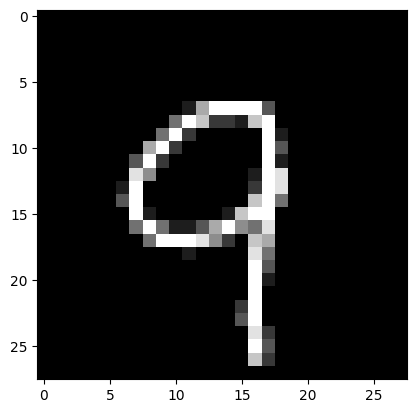

index: 50983
Lable: 5


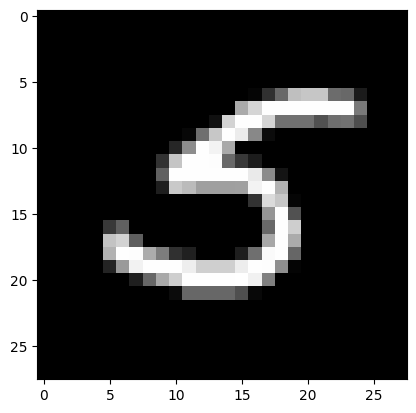

index: 46858
Lable: 7


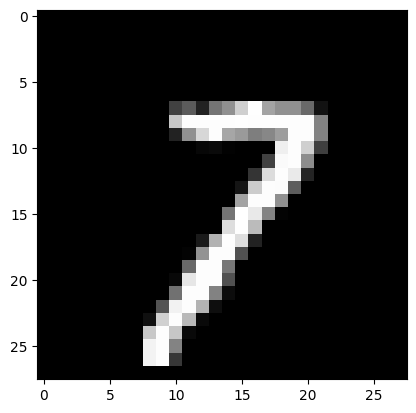

index: 54822
Lable: 0


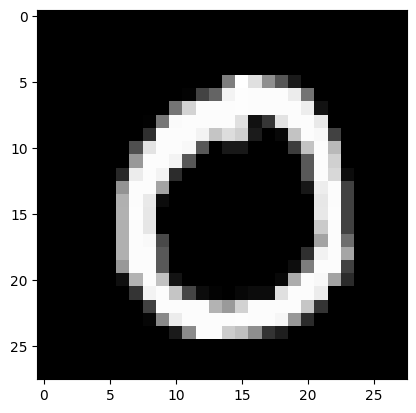

index: 45864
Lable: 9


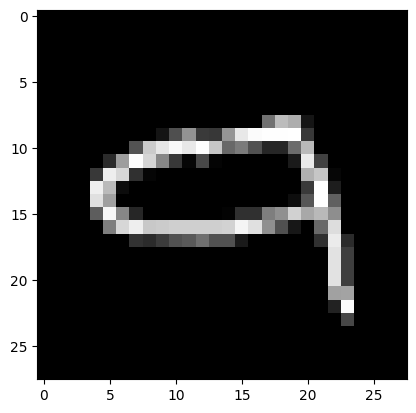

index: 24075
Lable: 0


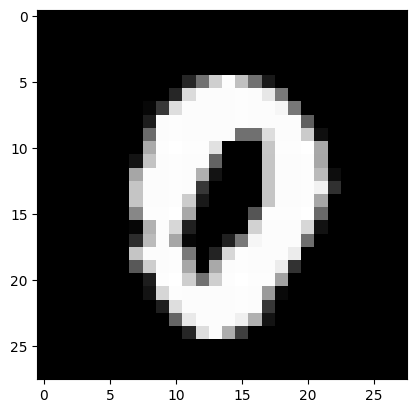

index: 28759
Lable: 3


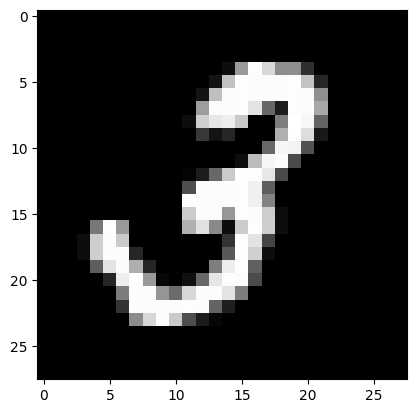

index: 6725
Lable: 2


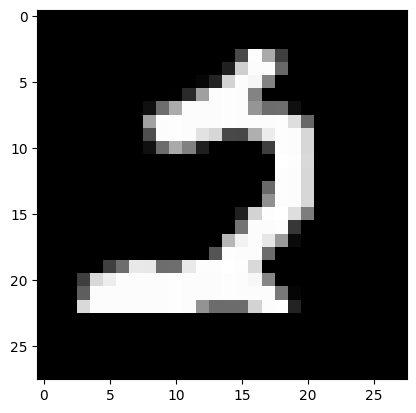

index: 43085
Lable: 1


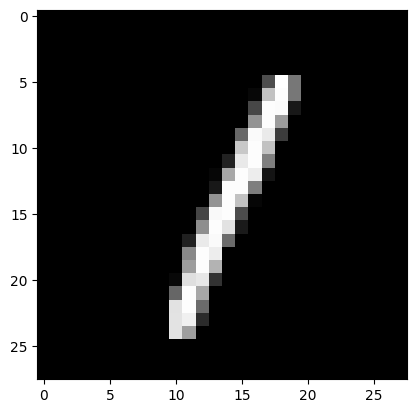

index: 33825
Lable: 5


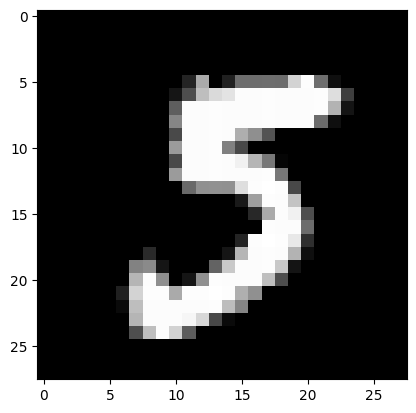

___________________


Randomly printing 10 images with labels from testing dataset
index: 7201
Lable: 9


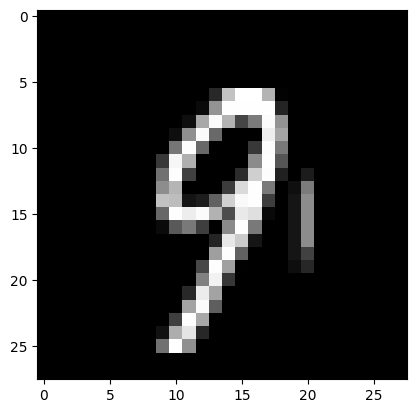

index: 35428
Lable: 8


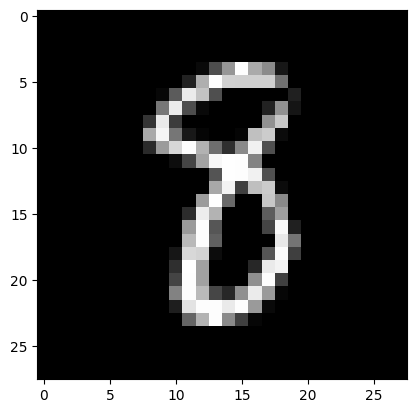

index: 18475
Lable: 9


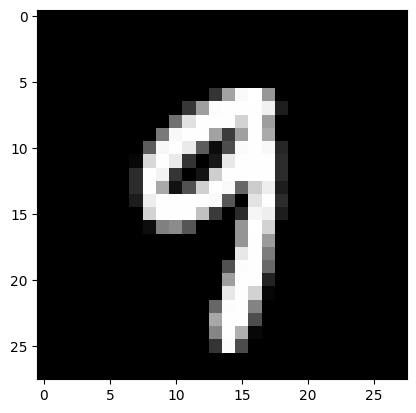

index: 24893
Lable: 0


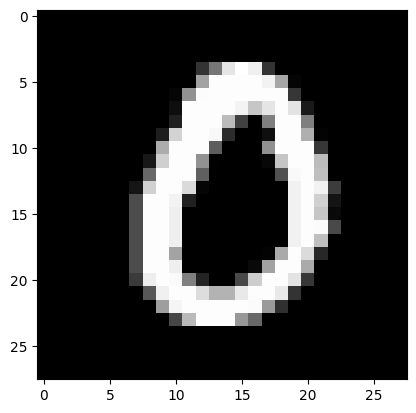

index: 7879
Lable: 2


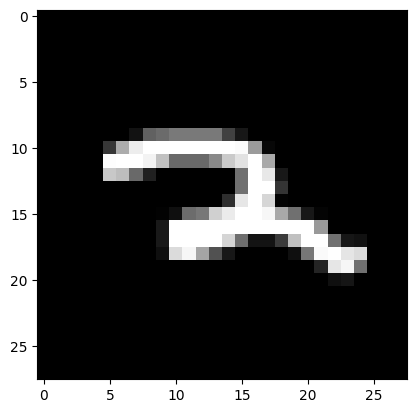

index: 25701
Lable: 0


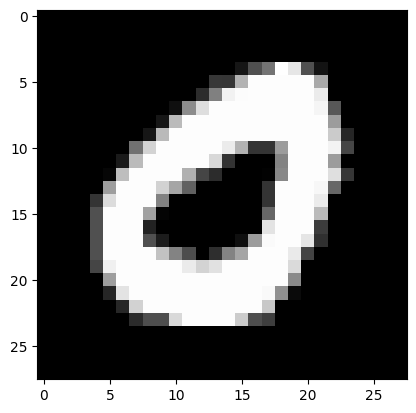

index: 449
Lable: 6


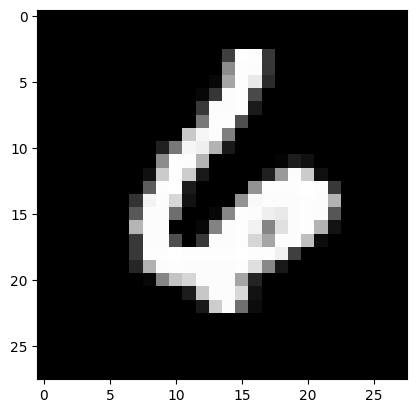

index: 2789
Lable: 6


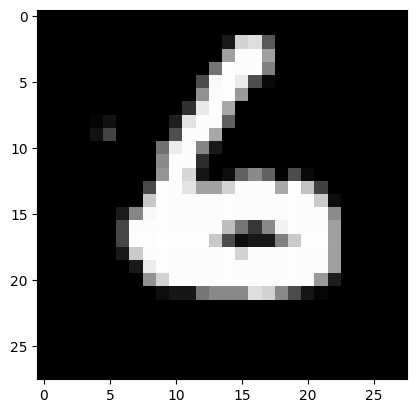

index: 38271
Lable: 8


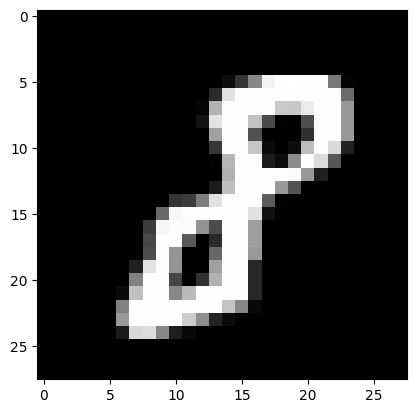

index: 42527
Lable: 7


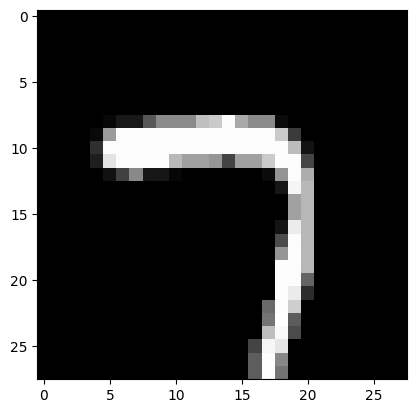

___________________


There are 60000 labels in training dataset for 60000 images in training dataset
There are 10000 labels in testing dataset for 10000 images in testing dataset
___________________


There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

___________________




In [70]:
# Loading dataset
dataset = tensorflow.keras.datasets.mnist.load_data()

# Description of dataset

# mnint is handwritten digits (0 to 9) images dataset
# keras.datasets.mnist.load_data() loads those images in gray scale as cv2 images / np arrays
# with those labels


# dataset is in tuple form,
# its first index dataset[0] represents training dataset
# its second index dataset[1] represents testing dataset

# Both training (dataset[0]) and testing (dataset[1]) datasets
# are further tuples and have two elements,

# first element of both training and testing (dataset[0][0] and dataset[0][0])
# represnts images in numpy arrays
print("There are",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][0]),"images in testing dataset")
print("___________________\n\n")
# Each image is of shape 28x28
print(dataset[0][0][0].shape)
print("___________________")


# second element of both training and testing (dataset[0][1] and dataset[0][1])
# represents labels of the images, presents on the same index in images
# For example dataset[0][0][0] is an image in training dataset
# and dataset[0][1][0] is the label of same image is training dataset
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(dataset[0])
print("___________________\n\n")
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(dataset[0])
print("___________________\n\n")

print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][1]),"labels in testing dataset for",len(dataset[1][0]),"images in testing dataset")
print("___________________\n\n")

print("There are", len(set(dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[0][1]))
print("There are", len(set(dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[1][1]))
print("___________________\n\n")






In [73]:
def reduced_data(X, Y, sample_size):
    unique_classes = np.unique(Y)
    sample_size = sample_size//len(unique_classes)
    X_reduced = []
    Y_reduced = []

    for cls in unique_classes:
        X_class = X[Y == cls]
        Y_class = Y[Y == cls]
        index = np.random.choice(range(len(X_class)), size=sample_size, replace=False)
        X_reduced.append(X_class[index])
        Y_reduced.append(Y_class[index])

    return np.concatenate(X_reduced), np.concatenate(Y_reduced)


X_train,Y_train,x_test,y_test = dataset[0][0],dataset[0][1],dataset[1][0],dataset[1][1]

X_train_reduced, y_train_reduced = reduced_data(X_train, Y_train, 6000)
X_test_reduced, y_test_reduced = reduced_data(x_test, y_test, 1000)

new_dataset = ((X_train_reduced, y_train_reduced),(X_test_reduced, y_test_reduced))



(28, 28)
___________________
There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in training dataset for 1000 images in training dataset
___________________


There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 600,
         1: 600,
         2: 600,
         3: 600,
         4: 600,
         5: 600,
         6: 600,
         7: 600,
         8: 600,
         9: 600})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 100,
         1: 100,
         2: 100,
         3: 100,
         4: 100,
         5: 100,
         6: 100,
         7: 100,
         8: 100,
         9: 100})

___________________


Randomly printing 10 images with labels from training dataset
index: 4616
Lable: 7


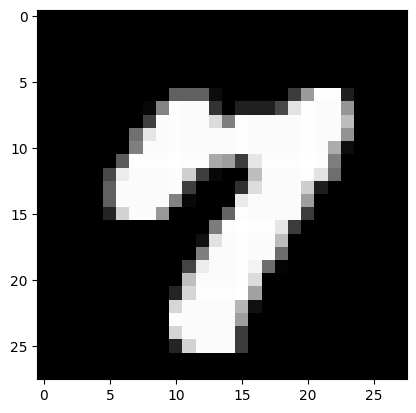

index: 2995
Lable: 4


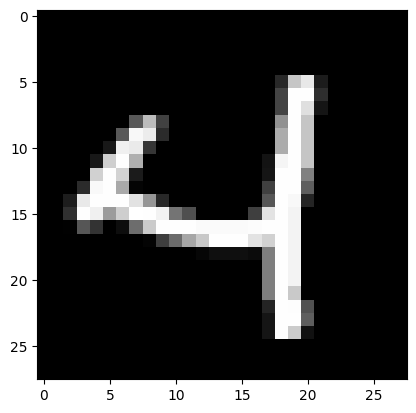

index: 2045
Lable: 3


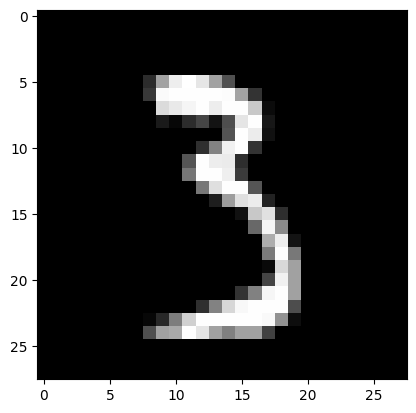

index: 5554
Lable: 9


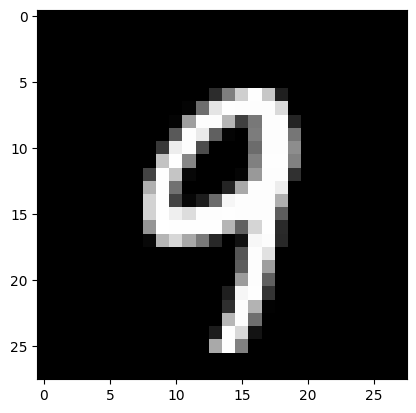

index: 1270
Lable: 2


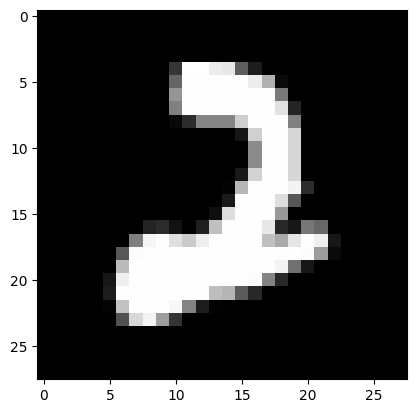

index: 3585
Lable: 5


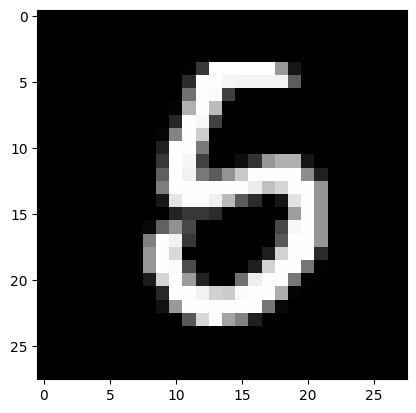

index: 1382
Lable: 2


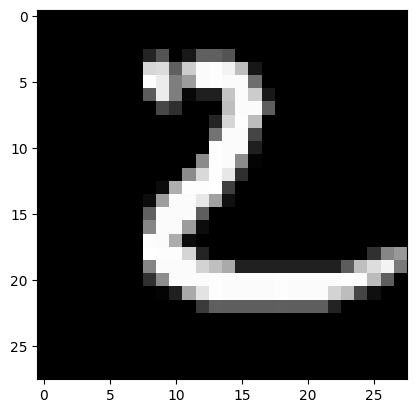

index: 4415
Lable: 7


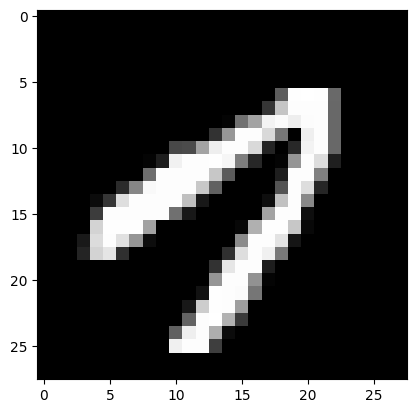

index: 1380
Lable: 2


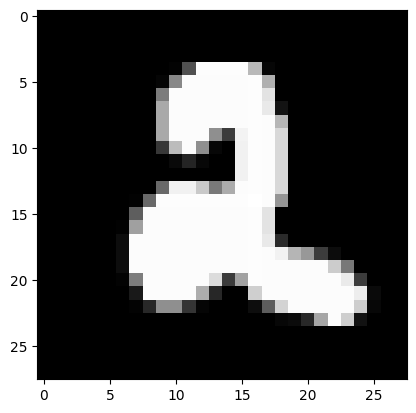

index: 4215
Lable: 7


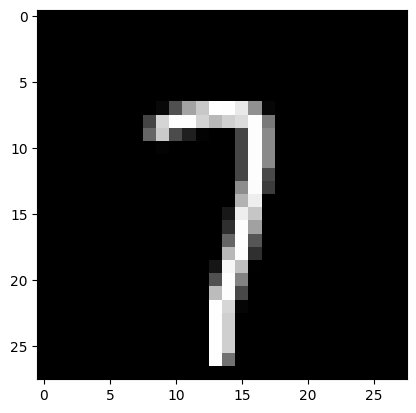

___________________


Randomly printing 10 images with labels from testing dataset
index: 339
Lable: 0


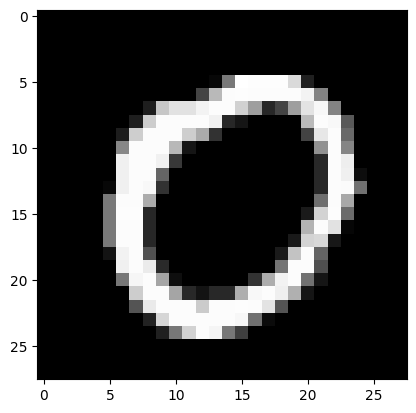

index: 3890
Lable: 6


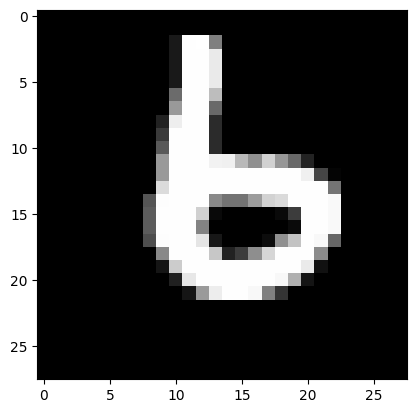

index: 5011
Lable: 8


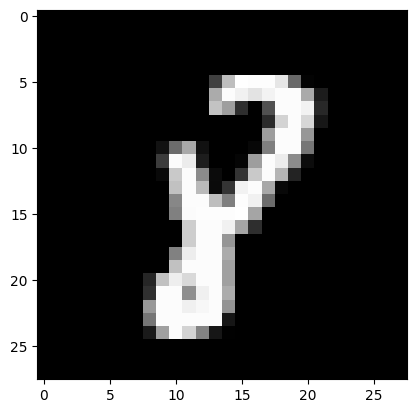

index: 2390
Lable: 3


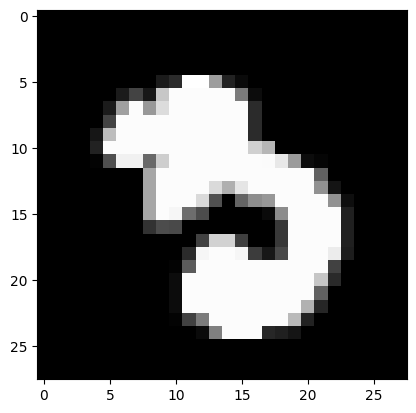

index: 5783
Lable: 9


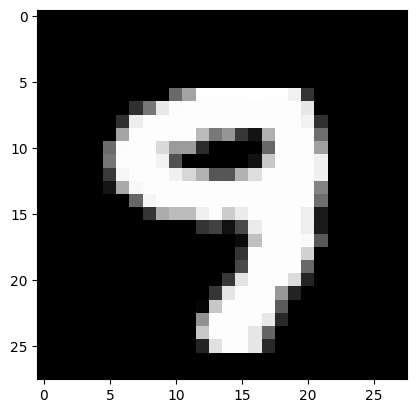

index: 4022
Lable: 6


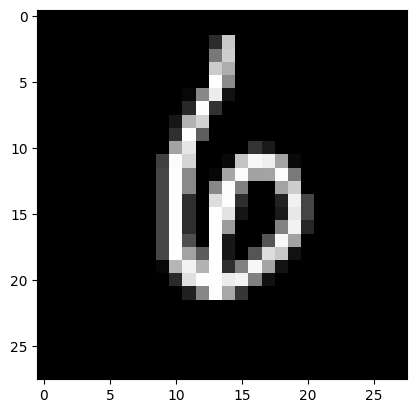

index: 1862
Lable: 3


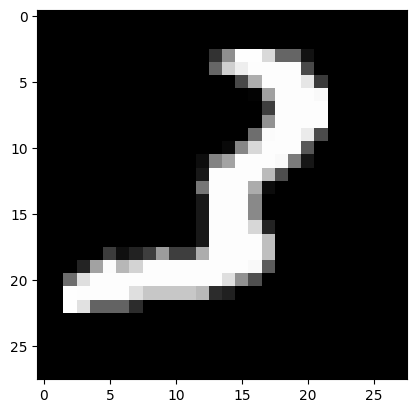

index: 325
Lable: 0


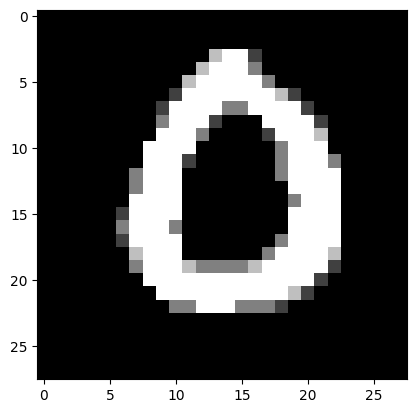

index: 1422
Lable: 2


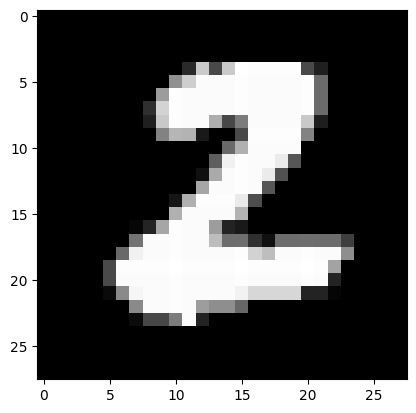

index: 1840
Lable: 3


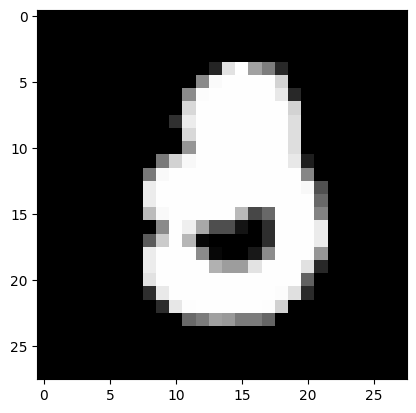

___________________




In [74]:
# Checking the shape of first image in new training dataset
print(new_dataset[0][0][0].shape)
print("___________________")


# Checking the size of dataset
print("There are",len(new_dataset[0][1]),"labels in training dataset for",len(new_dataset[0][0]),"images in training dataset")
print("There are",len(new_dataset[1][1]),"labels in training dataset for",len(new_dataset[1][0]),"images in training dataset")
print("___________________\n\n")
# Excepted output
# There are 6000 labels in training dataset for 6000 images in training dataset
# There are 1000 labels in training dataset for 1000 images in training dataset




# Checking the number of images per class
print("There are", len(set(new_dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[0][1]))
print("There are", len(set(new_dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[1][1]))
print("___________________\n\n")
# Expected output
# There are 10 unique classes in training dataset
# Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
# Counter({0: 600,
#          1: 600,
#          2: 600,
#          3: 600,
#          4: 600,
#          5: 600,
#          6: 600,
#          7: 600,
#          8: 600,
#          9: 600})
# There are 10 unique classes in validation dataset
# Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
# Counter({0: 100,
#          1: 100,
#          2: 100,
#          3: 100,
#          4: 100,
#          5: 100,
#          6: 100,
#          7: 100,
#          8: 100,
#          9: 100})


# Checking the correctness of indexing of image and its labels
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________\n\n")
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________\n\n")